# Data importeren

Importeren van de data uit drive,
vul de authorization code in die verkregen wordt via de link.

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
!ln -s "/gdrive/My Drive/Schilderijen-Classificeren_Arthur-Huys/datasets" "/content/datasets"

Mounted at /gdrive


In [ ]:
import shutil
shutil.unpack_archive('datasets/Picasso_Rubens_400_100_100.zip','.','zip')

# bepalen optimal image size op een convnet from scratch

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow import keras
from tensorflow.keras import layers

## width, heigth -> 80, 100, 150, 200, 300

In [ ]:
widthList = [80, 100, 150, 200, 300]
accuracy = []

for i in range(len(widthList)):
  width = widthList[i]
  height = width
  train_dataset = image_dataset_from_directory(
      "Picasso_Rubens_400_100_100/train",
      image_size=(width, height),
      batch_size=32)
  validation_dataset = image_dataset_from_directory(
      "Picasso_Rubens_400_100_100/validation",
      image_size=(width, height),
      batch_size=32)

  test_dataset = image_dataset_from_directory(
      "Picasso_Rubens_400_100_100/test",
      image_size=(width, height),
      batch_size=32)
  
  inputs = keras.Input(shape=(width, height, 3))
  x = layers.Rescaling(1./255)(inputs)
  x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
  x = layers.MaxPooling2D(pool_size=2)(x)
  x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
  x = layers.MaxPooling2D(pool_size=2)(x)
  x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
  x = layers.MaxPooling2D(pool_size=2)(x)
  x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
  x = layers.MaxPooling2D(pool_size=2)(x)
  x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
  x = layers.Flatten()(x)
  outputs = layers.Dense(1, activation="sigmoid")(x)
  model = keras.Model(inputs=inputs, outputs=outputs)

  model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])
  
  callbacks = [keras.callbacks.ModelCheckpoint(
    filepath="convnet_from_scratch.keras",
    save_best_only=True,
    monitor="val_loss")]
  
  history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)
  
  test_model = keras.models.load_model("convnet_from_scratch.keras")
  test_loss, test_acc = test_model.evaluate(test_dataset)
  accuracy.append(test_acc)

Found 800 files belonging to 2 classes.
Found 200 files belonging to 2 classes.
Found 200 files belonging to 2 classes.
Epoch 1/30
25/25 [==============================] - 18s 169ms/step - loss: 0.9210 - accuracy: 0.5113 - val_loss: 0.6765 - val_accuracy: 0.5100
Epoch 2/30
25/25 [==============================] - 5s 152ms/step - loss: 0.6992 - accuracy: 0.5487 - val_loss: 0.6760 - val_accuracy: 0.6800
Epoch 3/30
25/25 [==============================] - 5s 153ms/step - loss: 0.7556 - accuracy: 0.6112 - val_loss: 0.5865 - val_accuracy: 0.6700
Epoch 4/30
25/25 [==============================] - 5s 154ms/step - loss: 0.6077 - accuracy: 0.6888 - val_loss: 0.4767 - val_accuracy: 0.7650
Epoch 5/30
25/25 [==============================] - 5s 152ms/step - loss: 0.5669 - accuracy: 0.7387 - val_loss: 0.4491 - val_accuracy: 0.8250
Epoch 6/30
25/25 [==============================] - 5s 149ms/step - loss: 0.5565 - accuracy: 0.7387 - val_loss: 0.4801 - val_accuracy: 0.8050
Epoch 7/30
25/25 [=========

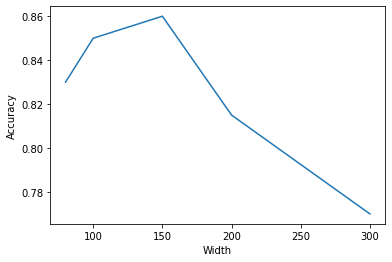

In [ ]:
import matplotlib.pyplot as plt

plt.plot(widthList, accuracy)

plt.xlabel("Width")
plt.ylabel("Accuracy")

plt.show()

We zien dat de accuracy het best is tussen de 100 en 200, bij de volgende stap gaan we verschillende groottes testen tussen 100 en 200.

## width, height -> 120, 140, 160, 180

In [ ]:
widthList = [120, 140, 160, 180]
accuracy = []

for i in range(len(widthList)):
  width = widthList[i]
  height = width
  train_dataset = image_dataset_from_directory(
      "Picasso_Rubens_400_100_100/train",
      image_size=(width, height),
      batch_size=32)
  validation_dataset = image_dataset_from_directory(
      "Picasso_Rubens_400_100_100/validation",
      image_size=(width, height),
      batch_size=32)

  test_dataset = image_dataset_from_directory(
      "Picasso_Rubens_400_100_100/test",
      image_size=(width, height),
      batch_size=32)
  
  inputs = keras.Input(shape=(width, height, 3))
  x = layers.Rescaling(1./255)(inputs)
  x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
  x = layers.MaxPooling2D(pool_size=2)(x)
  x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
  x = layers.MaxPooling2D(pool_size=2)(x)
  x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
  x = layers.MaxPooling2D(pool_size=2)(x)
  x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
  x = layers.MaxPooling2D(pool_size=2)(x)
  x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
  x = layers.Flatten()(x)
  outputs = layers.Dense(1, activation="sigmoid")(x)
  model = keras.Model(inputs=inputs, outputs=outputs)

  model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])
  
  callbacks = [keras.callbacks.ModelCheckpoint(
    filepath="convnet_from_scratch.keras",
    save_best_only=True,
    monitor="val_loss")]
  
  history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)
  
  test_model = keras.models.load_model("convnet_from_scratch.keras")
  test_loss, test_acc = test_model.evaluate(test_dataset)
  accuracy.append(test_acc)

Found 800 files belonging to 2 classes.
Found 200 files belonging to 2 classes.
Found 200 files belonging to 2 classes.
Epoch 1/30
25/25 [==============================] - 7s 191ms/step - loss: 0.7831 - accuracy: 0.5562 - val_loss: 0.6190 - val_accuracy: 0.5800
Epoch 2/30
25/25 [==============================] - 5s 175ms/step - loss: 0.7376 - accuracy: 0.6037 - val_loss: 0.5643 - val_accuracy: 0.7250
Epoch 3/30
25/25 [==============================] - 5s 171ms/step - loss: 0.7388 - accuracy: 0.6675 - val_loss: 0.5781 - val_accuracy: 0.7350
Epoch 4/30
25/25 [==============================] - 5s 172ms/step - loss: 0.5838 - accuracy: 0.6750 - val_loss: 0.5669 - val_accuracy: 0.8000
Epoch 5/30
25/25 [==============================] - 5s 173ms/step - loss: 0.5350 - accuracy: 0.7325 - val_loss: 0.5379 - val_accuracy: 0.7850
Epoch 6/30
25/25 [==============================] - 5s 174ms/step - loss: 0.5158 - accuracy: 0.7362 - val_loss: 0.4137 - val_accuracy: 0.8400
Epoch 7/30
25/25 [==========

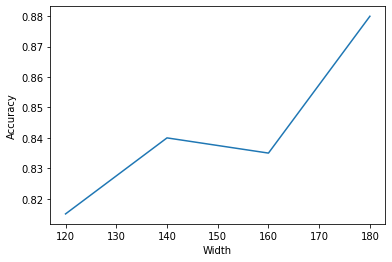

In [ ]:
import matplotlib.pyplot as plt

plt.plot(widthList, accuracy)

plt.xlabel("Width")
plt.ylabel("Accuracy")

plt.show()

We zien hier dat de accuracy het hoogst is bij 180, bij de volgende stap gaan we dit nog eens controleren met nog meer groottes te testen tussen de 100 en 200.

## width, height -> 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200

In [ ]:
widthList = [100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
accuracy = []

for i in range(len(widthList)):
  width = widthList[i]
  height = width
  train_dataset = image_dataset_from_directory(
      "Picasso_Rubens_400_100_100/train",
      image_size=(width, height),
      batch_size=32)
  validation_dataset = image_dataset_from_directory(
      "Picasso_Rubens_400_100_100/validation",
      image_size=(width, height),
      batch_size=32)

  test_dataset = image_dataset_from_directory(
      "Picasso_Rubens_400_100_100/test",
      image_size=(width, height),
      batch_size=32)
  
  inputs = keras.Input(shape=(width, height, 3))
  x = layers.Rescaling(1./255)(inputs)
  x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
  x = layers.MaxPooling2D(pool_size=2)(x)
  x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
  x = layers.MaxPooling2D(pool_size=2)(x)
  x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
  x = layers.MaxPooling2D(pool_size=2)(x)
  x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
  x = layers.MaxPooling2D(pool_size=2)(x)
  x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
  x = layers.Flatten()(x)
  outputs = layers.Dense(1, activation="sigmoid")(x)
  model = keras.Model(inputs=inputs, outputs=outputs)

  model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])
  
  callbacks = [keras.callbacks.ModelCheckpoint(
    filepath="convnet_from_scratch.keras",
    save_best_only=True,
    monitor="val_loss")]
  
  history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)
  
  test_model = keras.models.load_model("convnet_from_scratch.keras")
  test_loss, test_acc = test_model.evaluate(test_dataset)
  accuracy.append(test_acc)

Found 800 files belonging to 2 classes.
Found 200 files belonging to 2 classes.
Found 200 files belonging to 2 classes.
Epoch 1/30
25/25 [==============================] - 6s 150ms/step - loss: 0.7913 - accuracy: 0.5150 - val_loss: 0.6573 - val_accuracy: 0.7400
Epoch 2/30
25/25 [==============================] - 5s 145ms/step - loss: 0.7003 - accuracy: 0.5788 - val_loss: 0.6431 - val_accuracy: 0.6500
Epoch 3/30
25/25 [==============================] - 5s 142ms/step - loss: 0.6509 - accuracy: 0.6963 - val_loss: 0.5293 - val_accuracy: 0.7650
Epoch 4/30
25/25 [==============================] - 5s 142ms/step - loss: 0.5859 - accuracy: 0.7075 - val_loss: 0.5006 - val_accuracy: 0.8200
Epoch 5/30
25/25 [==============================] - 5s 140ms/step - loss: 0.5611 - accuracy: 0.7312 - val_loss: 0.4181 - val_accuracy: 0.8450
Epoch 6/30
25/25 [==============================] - 5s 141ms/step - loss: 0.4965 - accuracy: 0.7563 - val_loss: 0.3756 - val_accuracy: 0.8550
Epoch 7/30
25/25 [==========

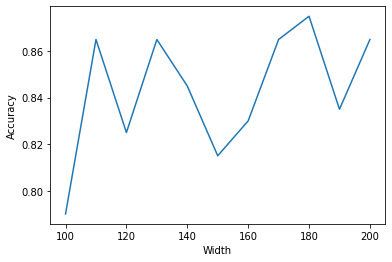

In [ ]:
import matplotlib.pyplot as plt

plt.plot(widthList, accuracy)

plt.xlabel("Width")
plt.ylabel("Accuracy")

plt.show()

We zien hier dat er niet echt een patroon in zit, wel is hier weer 180 het best. Dit kan ook toeval zijn.

## Conclusie

We kunnen hieruit besluiten dat de beste size van de images tussen 100-200 ligt, het maakt niet zo veel uit welke waarde hier genomen wordt omdat dit niet altijd resulteert in gelijke waarden. We zien we dat de image size (180, 180) 2 keer het best presteert. Daarom ga ik deze waarden gebruiken voor het trainen van een convnet van scratch.

# Bepalen optimal image size op een pretrained model (VGG16)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

## Size (180, 180)

### creeëren datasets

Maken van 3 datasets (train, validation, test), met een bepaalde image size (zie colab "Optimal image size") en een batch size.

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    "Picasso_Rubens_400_100_100/train",
    image_size=(180, 180),
    batch_size=32)

validation_dataset = image_dataset_from_directory(
    "Picasso_Rubens_400_100_100/validation",
    image_size=(180, 180),
    batch_size=32)

test_dataset = image_dataset_from_directory(
    "Picasso_Rubens_400_100_100/test",
    image_size=(180, 180),
    batch_size=32)

Found 800 files belonging to 2 classes.
Found 200 files belonging to 2 classes.
Found 200 files belonging to 2 classes.


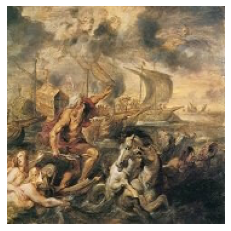

In [ ]:
import matplotlib.pyplot as plt
for images, _ in train_dataset.take(1):
  plt.imshow(images[0].numpy().astype("uint8"))
  plt.axis("off")

### leren model

In [ ]:
conv_base = keras.applications.vgg16.VGG16(
weights="imagenet",
include_top=False)
conv_base.trainable = False

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
data_augmentation = keras.Sequential(
    [layers.RandomFlip("horizontal"),
     layers.RandomRotation(0.1),
     layers.RandomZoom(0.2),])

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [keras.callbacks.ModelCheckpoint(
    filepath="feature_extraction_with_data_augmentation.keras",
    save_best_only=True,
    monitor="val_loss")]

In [ ]:
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
25/25 [==============================] - 27s 399ms/step - loss: 17.1918 - accuracy: 0.8438 - val_loss: 8.5987 - val_accuracy: 0.9100
Epoch 2/100
25/25 [==============================] - 9s 290ms/step - loss: 6.2508 - accuracy: 0.9225 - val_loss: 9.8479 - val_accuracy: 0.9150
Epoch 3/100
25/25 [==============================] - 8s 288ms/step - loss: 3.6280 - accuracy: 0.9513 - val_loss: 11.3775 - val_accuracy: 0.9150
Epoch 4/100
25/25 [==============================] - 9s 299ms/step - loss: 4.8353 - accuracy: 0.9413 - val_loss: 6.6957 - val_accuracy: 0.9450
Epoch 5/100
25/25 [==============================] - 8s 288ms/step - loss: 2.6178 - accuracy: 0.9638 - val_loss: 11.0668 - val_accuracy: 0.9100
Epoch 6/100
25/25 [==============================] - 8s 285ms/step - loss: 2.6617 - accuracy: 0.9538 - val_loss: 30.5959 - val_accuracy: 0.8300
Epoch 7/100
25/25 [==============================] - 8s 287ms/step - loss: 3.4837 - accuracy: 0.9513 - val_loss: 16.2796 - val_accuracy: 

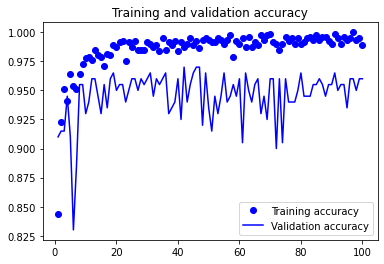

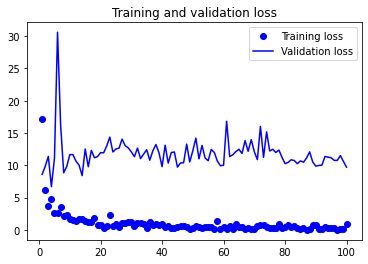

In [ ]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

7/7 [==============================] - 2s 167ms/step - loss: 7.1945 - accuracy: 0.9450
Test accuracy: 0.945


## Size (224,224)

### creeëren datasets

Maken van 3 datasets (train, validation, test), met een bepaalde image size (zie colab "Optimal image size") en een batch size.

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    "Picasso_Rubens_400_100_100/train",
    image_size=(224, 224),
    batch_size=32)

validation_dataset = image_dataset_from_directory(
    "Picasso_Rubens_400_100_100/validation",
    image_size=(224, 224),
    batch_size=32)

test_dataset = image_dataset_from_directory(
    "Picasso_Rubens_400_100_100/test",
    image_size=(224, 224),
    batch_size=32)

Found 800 files belonging to 2 classes.
Found 200 files belonging to 2 classes.
Found 200 files belonging to 2 classes.


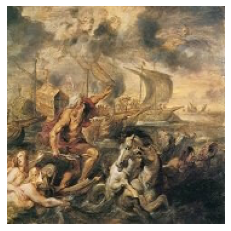

In [ ]:
import matplotlib.pyplot as plt
for images, _ in train_dataset.take(1):
  plt.imshow(images[0].numpy().astype("uint8"))
  plt.axis("off")

### Leren model

In [ ]:
conv_base = keras.applications.vgg16.VGG16(
weights="imagenet",
include_top=False)
conv_base.trainable = False

In [ ]:
data_augmentation = keras.Sequential(
    [layers.RandomFlip("horizontal"),
     layers.RandomRotation(0.1),
     layers.RandomZoom(0.2),])

In [ ]:
inputs = keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [keras.callbacks.ModelCheckpoint(
    filepath="feature_extraction_with_data_augmentation.keras",
    save_best_only=True,
    monitor="val_loss")]

In [ ]:
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
25/25 [==============================] - 11s 364ms/step - loss: 7.6800 - accuracy: 0.9513 - val_loss: 6.1235 - val_accuracy: 0.9750
Epoch 2/100
25/25 [==============================] - 10s 350ms/step - loss: 2.9119 - accuracy: 0.9712 - val_loss: 7.7029 - val_accuracy: 0.9650
Epoch 3/100
25/25 [==============================] - 11s 363ms/step - loss: 3.2999 - accuracy: 0.9787 - val_loss: 6.1192 - val_accuracy: 0.9750
Epoch 4/100
25/25 [==============================] - 11s 355ms/step - loss: 2.5381 - accuracy: 0.9762 - val_loss: 7.0823 - val_accuracy: 0.9850
Epoch 5/100
25/25 [==============================] - 10s 350ms/step - loss: 1.6510 - accuracy: 0.9837 - val_loss: 16.0115 - val_accuracy: 0.9300
Epoch 6/100
25/25 [==============================] - 10s 353ms/step - loss: 3.9659 - accuracy: 0.9750 - val_loss: 9.8813 - val_accuracy: 0.9650
Epoch 7/100
25/25 [==============================] - 10s 350ms/step - loss: 2.3621 - accuracy: 0.9737 - val_loss: 7.9603 - val_accuracy

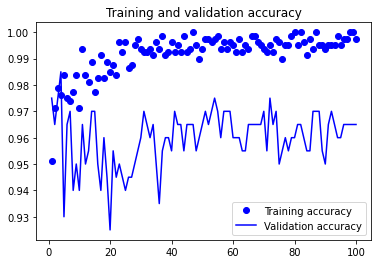

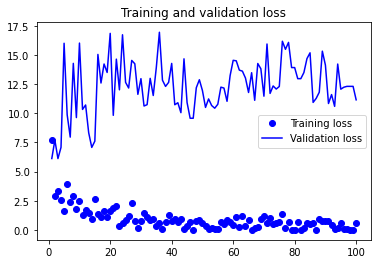

In [ ]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

7/7 [==============================] - 3s 214ms/step - loss: 5.7170 - accuracy: 0.9600
Test accuracy: 0.960


## Size (280, 280)

### creeëren datasets

Maken van 3 datasets (train, validation, test), met een bepaalde image size (zie colab "Optimal image size") en een batch size.

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    "Picasso_Rubens_400_100_100/train",
    image_size=(280, 280),
    batch_size=32)

validation_dataset = image_dataset_from_directory(
    "Picasso_Rubens_400_100_100/validation",
    image_size=(280, 280),
    batch_size=32)

test_dataset = image_dataset_from_directory(
    "Picasso_Rubens_400_100_100/test",
    image_size=(280, 280),
    batch_size=32)

Found 800 files belonging to 2 classes.
Found 200 files belonging to 2 classes.
Found 200 files belonging to 2 classes.


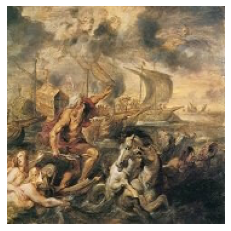

In [ ]:
import matplotlib.pyplot as plt
for images, _ in train_dataset.take(1):
  plt.imshow(images[0].numpy().astype("uint8"))
  plt.axis("off")

### Leren model

In [ ]:
conv_base = keras.applications.vgg16.VGG16(
weights="imagenet",
include_top=False)
conv_base.trainable = False

In [ ]:
data_augmentation = keras.Sequential(
    [layers.RandomFlip("horizontal"),
     layers.RandomRotation(0.1),
     layers.RandomZoom(0.2),])

In [ ]:
inputs = keras.Input(shape=(280, 280, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [keras.callbacks.ModelCheckpoint(
    filepath="feature_extraction_with_data_augmentation.keras",
    save_best_only=True,
    monitor="val_loss")]

In [ ]:
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
25/25 [==============================] - 35s 757ms/step - loss: 49.8250 - accuracy: 0.8462 - val_loss: 8.5994 - val_accuracy: 0.9300
Epoch 2/100
25/25 [==============================] - 16s 563ms/step - loss: 8.3456 - accuracy: 0.9388 - val_loss: 9.4176 - val_accuracy: 0.9350
Epoch 3/100
25/25 [==============================] - 16s 575ms/step - loss: 10.0955 - accuracy: 0.9438 - val_loss: 8.1065 - val_accuracy: 0.9550
Epoch 4/100
25/25 [==============================] - 15s 559ms/step - loss: 7.4301 - accuracy: 0.9513 - val_loss: 9.5992 - val_accuracy: 0.9500
Epoch 5/100
25/25 [==============================] - 16s 571ms/step - loss: 3.3654 - accuracy: 0.9725 - val_loss: 10.0911 - val_accuracy: 0.9350
Epoch 6/100
25/25 [==============================] - 16s 565ms/step - loss: 3.1240 - accuracy: 0.9762 - val_loss: 14.3130 - val_accuracy: 0.9450
Epoch 7/100
25/25 [==============================] - 16s 577ms/step - loss: 2.4906 - accuracy: 0.9775 - val_loss: 7.5415 - val_accur

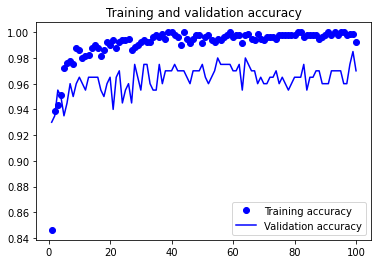

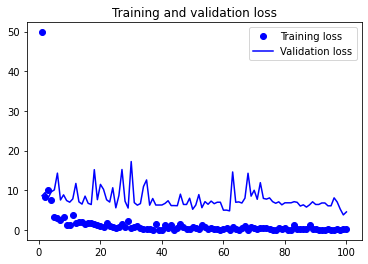

In [ ]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

7/7 [==============================] - 4s 364ms/step - loss: 7.6895 - accuracy: 0.9800
Test accuracy: 0.980


## Conclusie

We zien dat de accuracy steeds verhoogd hoe groter de input foto's zijn, zie onderstaand.

Size(180, 180): accuracy = 94.5%

Size(224, 224): accuracy = 96%

Size(280, 280): accuracy = 98%

We kunnen hierdoor besluiten dat de accuracy beter wordt hoe groter de input, voor de volgende pretrained convnet models zal ik de size van de images omzetten naar (224, 224) omdat dit ook de grote is van de initiele fotos waarop de meeste modellen worden getraind.

Wanneer we een te grote image size nemen dan zal het ook langer duren om het model te fitten.
